###Requare Libraries

In [1]:
try:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn import datasets
    from sklearn.model_selection import train_test_split
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score
    from sklearn.preprocessing import StandardScaler
    from mlxtend.plotting import plot_decision_regions
except:
    !pip install pandas
    !pip install numpy
    !pip install scikit_learn
    !pip install mlxtend
    !pip install matplotlib

    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn import datasets
    from sklearn.model_selection import train_test_split
    from sklearn.svm import SVC
    from sklearn.metrics import accuracy_score
    from sklearn.preprocessing import StandardScaler
    from mlxtend.plotting import plot_decision_regions



###Load the Iris dataset

In [2]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

###Split the dataset into training and test sets

In [3]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

###Standardize the features

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

###Experiment with different kernels (linear, polynomial, RBF) and tune the hyperparameters (C and gamma) to achieve the best performance.

In [5]:
# Define a dictionary to store accuracy scores
svm_results = {}

###Linear kernel

In [6]:
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
svm_results['linear'] = accuracy_linear

###Polynomial kernel

In [8]:
svm_poly = SVC(kernel='poly', C=1.0, gamma='auto', degree=3)
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
svm_results['poly'] = accuracy_poly

###RBF kernel

In [9]:
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
svm_results['rbf'] = accuracy_rbf

###Calculate the accuracy of the model on the test dataset.

In [10]:
# Print the accuracy results
print("SVM Results:")
for kernel, accuracy in svm_results.items():
    print(f"Kernel: {kernel}, Accuracy: {accuracy}")

SVM Results:
Kernel: linear, Accuracy: 0.9777777777777777
Kernel: poly, Accuracy: 0.9555555555555556
Kernel: rbf, Accuracy: 1.0


###Visualize the decision boundaries for the best-performing SVM model.

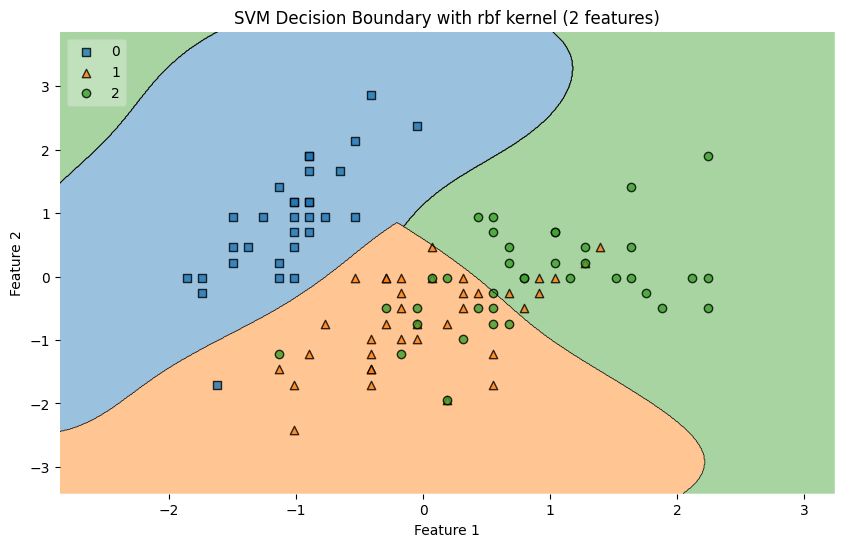

In [11]:
# Visualize decision boundaries for the best-performing SVM model
best_kernel = max(svm_results, key=svm_results.get)
if best_kernel == 'linear':
    best_svm = svm_linear
elif best_kernel == 'poly':
    best_svm = svm_poly
else:
    best_svm = svm_rbf

# Select the first two features for visualization
X_train_2d = X_train[:, :2]
X_test_2d = X_test[:, :2]

# Best SVM model (retrain with 2 features)
best_svm_2d = SVC(kernel=best_svm.kernel, C=best_svm.C, gamma=best_svm.gamma)
best_svm_2d.fit(X_train_2d, y_train)

# Plotting decision boundaries for the best-performing SVM model
plt.figure(figsize=(10, 6))
plot_decision_regions(X_train_2d, y_train, clf=best_svm_2d, legend=2)
plt.title(f'SVM Decision Boundary with {best_kernel} kernel (2 features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

###Conclusion

####SVM model with an RBF kernel demonstrates strong performance in separating the three classes, highlighting its capability to manage non-linear decision boundaries effectively.

####Implementing K-Nearest Neighbors (KNN)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

# Fit the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

####Experiment with different values of n_neighbors and weights and analyze their impact on the model's performance

In [13]:
# Define a dictionary to store accuracy scores
knn_results = {}

for n in [3, 5, 7, 9]:
    for weight in ['uniform', 'distance']:
        knn = KNeighborsClassifier(n_neighbors=n, weights=weight)
        knn.fit(X_train, y_train)
        y_pred_knn = knn.predict(X_test)
        accuracy_knn = accuracy_score(y_test, y_pred_knn)
        knn_results[(n, weight)] = accuracy_knn

####Accuracy results

In [14]:
print("KNN Results:")
for params, accuracy in knn_results.items():
    print(f"n_neighbors: {params[0]}, weights: {params[1]}, Accuracy: {accuracy}")

KNN Results:
n_neighbors: 3, weights: uniform, Accuracy: 1.0
n_neighbors: 3, weights: distance, Accuracy: 1.0
n_neighbors: 5, weights: uniform, Accuracy: 1.0
n_neighbors: 5, weights: distance, Accuracy: 1.0
n_neighbors: 7, weights: uniform, Accuracy: 1.0
n_neighbors: 7, weights: distance, Accuracy: 1.0
n_neighbors: 9, weights: uniform, Accuracy: 1.0
n_neighbors: 9, weights: distance, Accuracy: 1.0


###Best KNN model (retrain with 2 features)

In [15]:
best_knn_params = max(knn_results, key=knn_results.get)
best_knn = KNeighborsClassifier(n_neighbors=best_knn_params[0], weights=best_knn_params[1])
best_knn.fit(X_train, y_train)

best_knn_2d = KNeighborsClassifier(n_neighbors=best_knn_params[0], weights=best_knn_params[1])
best_knn_2d.fit(X_train_2d, y_train)

KNeighborsClassifier(n_neighbors=3)

###Plotting decision boundaries for the best-performing KNN model

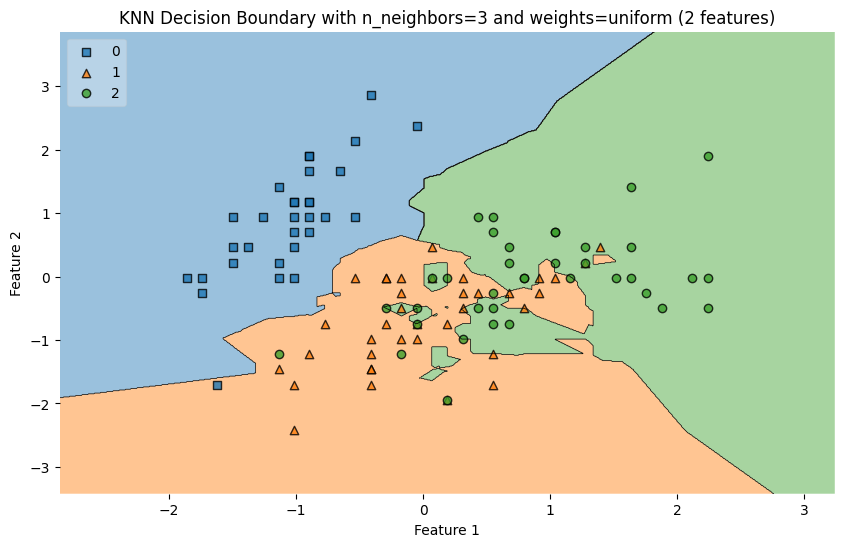

In [16]:
plt.figure(figsize=(10, 6))
plot_decision_regions(X_train_2d, y_train, clf=best_knn_2d, legend=2)
plt.title(f'KNN Decision Boundary with n_neighbors={best_knn_params[0]} and weights={best_knn_params[1]} (2 features)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

###Conclusion

The KNN model achieved perfect accuracy (1.0) for all tested values of n_neighbors (3, 5, 7, 9) and both weight options (uniform and distance). This indicates that the model is highly effective in classifying the test data with the given parameters.